#INSTALANDO LIBS



In [78]:
 #instalando as libs necessárias
if(!require(dendextend)) install.packages("dendextend")
# if(!require(corrplot)) install.packages('corrplot')

In [79]:
library(dplyr)
library(ggplot2)
library(dendextend)

#LEITURA DF

In [80]:
df <- read.csv(file = 'houses_to_rent_v2.csv')
df <- subset(df, select = -c(id, X))
df <- na.omit(df)
df

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa..R..,rent.amount..R..,property.tax..R..,fire.insurance..R..,total..R..
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
3,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
4,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
5,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
7,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
8,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
9,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440


In [81]:
#Removendo outliers
df2 = subset(df, rent.amount..R.. < 15000)
df2 = subset(df2, floor!="-")
df2$floor = as.numeric(df2$floor)
df2 = select(df2, area, rooms, rent.amount..R.., bathroom, parking.spaces, total..R..)


df2

,area,rooms,rent.amount..R..,bathroom,parking.spaces,total..R..
,<int>,<int>,<int>,<int>,<int>,<int>
1,70,2,3300,1,1,5618
2,320,4,4960,4,0,7973
3,80,1,2800,1,1,3841
4,51,2,1112,1,0,1421
5,25,1,800,1,0,836
7,72,2,1900,1,0,2750
8,213,4,3223,4,4,7253
10,35,1,2300,1,0,2955
11,26,1,2100,1,0,2747


In [82]:
#Padronizando variáveis
df2 <- scale(df2)

df2

,area,rooms,rent.amount..R..,bathroom,parking.spaces,total..R..
1,-0.08357035,-0.3127296,-0.02510188,-0.83779626,-0.2711433,0.024908367
2,0.32934056,1.6506050,0.58251345,1.62710564,-1.1057402,0.152160095
3,-0.06705391,-1.2943969,-0.20811855,-0.83779626,-0.2711433,-0.071111301
4,-0.11495158,-0.3127296,-0.82598281,-0.83779626,-1.1057402,-0.201875284
5,-0.15789431,-1.2943969,-0.94018521,-0.83779626,-1.1057402,-0.233485586
7,-0.08026706,-0.3127296,-0.53754854,-0.83779626,-1.1057402,-0.130063163
8,0.15261469,1.6506050,-0.05328645,1.62710564,2.2326474,0.113255108
10,-0.14137787,-1.2943969,-0.39113521,-0.83779626,-1.1057402,-0.118986049
11,-0.15624267,-1.2943969,-0.46434188,-0.83779626,-1.1057402,-0.130225267
12,-0.12320980,-1.2943969,-1.02071254,-0.83779626,-0.2711433,-0.214843613


In [83]:
#cálculo das distâncias utilizando o método euclidiano
matriz_dist <- dist(df2, method = 'euclidean')

In [84]:
#método hierárquico utilizando average linkage
dendrograma_ward <- hclust(matriz_dist, method = 'ward.D')

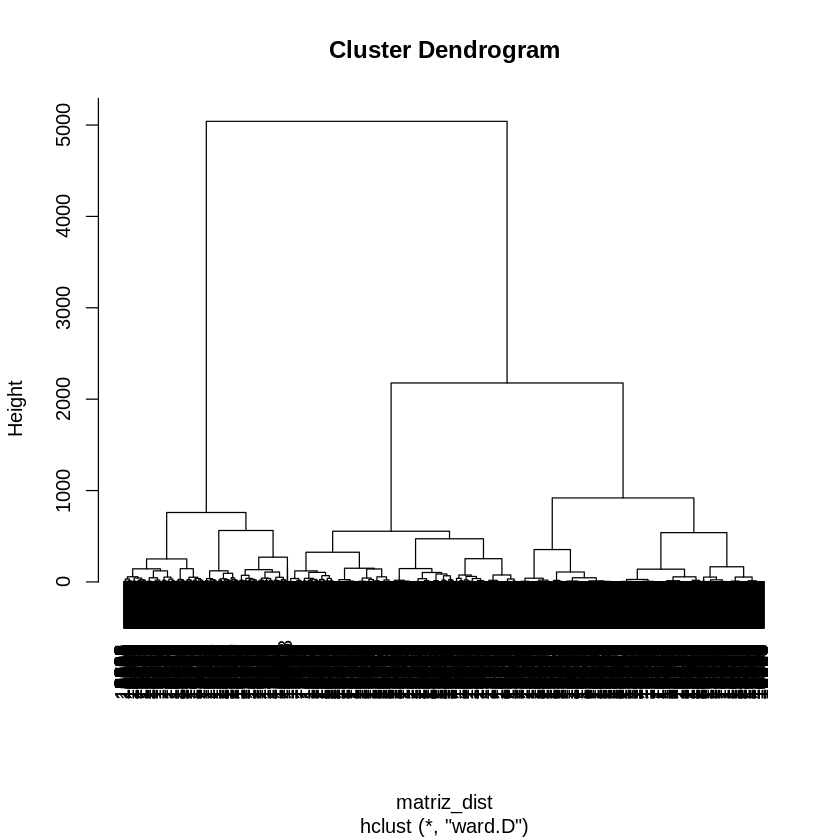

In [85]:
plot(dendrograma_ward)

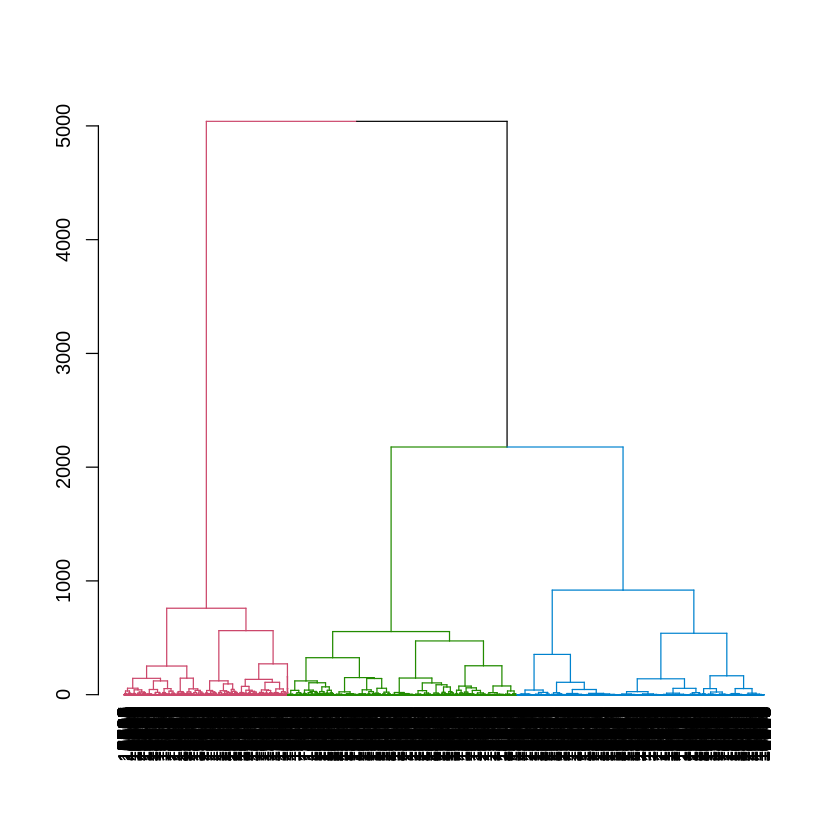

In [86]:
#visualizacao dos clusters
dendrograma <- as.dendrogram(dendrograma_ward)
dendrograma_cols <- color_branches(dendrograma, h = 2000)
plot(dendrograma_cols)